#  Data Science Campaign

Task is to analyse a data set with PCA and train a machine learning classifier on it. 

The provided dataset contains a feature space that describes various odorant molecules. It contains 184 numerical features describing physico-chemical parameters of 627 odorants. The target values indicate whether an odorant has a "fruity" smell. 



## Task 1 - Load the data
Run this cell to load the data but 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
def load_competition_training_data():
    train_df = pd.read_json('train_data.json')
    y = train_df['targets']
    train_df.drop('targets', axis=1, inplace=True)
    X = train_df.values
    return X,y

X_train, y_train = load_competition_training_data()

## Task 2 - Analysis with PCA 

### Task 2.1
Transform the training data in `X_train` such that covariance is identical to correlation.

In [2]:
# Code for task 2.1 here 
from sklearn import preprocessing 
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_scale= sc.transform(X_train)

### Task 2.2 
Perform a PCA on the transformed data. 

In [3]:
# Code for task 2.2 here
from sklearn.decomposition import PCA
principle_comp=PCA()
principle_comp.fit(X_scale)
X_pca = principle_comp.transform(X_scale)

### Task 2.3
Produce a scatter plot of the first two principal components where the two data classes are colored differently (use the labels in `y_train`). The plotting area should be square (width=height). Label the axes appropriately. Add a legend that maps dot color to class label ("fruity" or "not fruity"). 

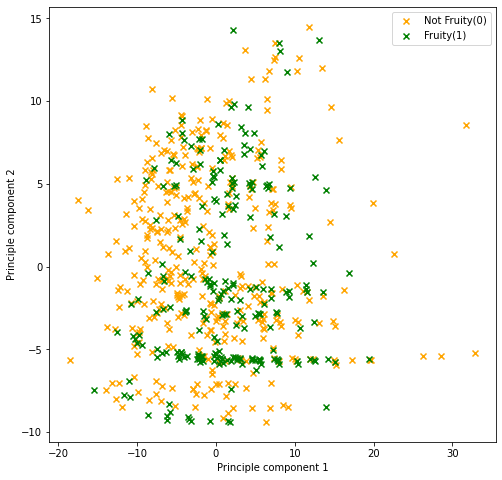

In [4]:
import warnings
warnings.filterwarnings("ignore")
pc1_x=[]
pc1_y=[]
pc2_x=[]
pc2_y=[]
for i in range(len(y_train)):
    if y_train[i]==1:
        pc2_y.append(X_pca[i,1])
        pc2_x.append(X_pca[i,0])
    else:
        pc1_y.append(X_pca[i,1])
        pc1_x.append(X_pca[i,0])

f = plt.figure(figsize=(8,8))
ax = f.gca()
ax.scatter(pc1_x,pc1_y,c="orange",marker='x',label="Not Fruity(0)")
ax.scatter(pc2_x,pc2_y,c="green",marker='x',label="Fruity(1)")
t = ax.set_xlabel('Principle component 1')
t = ax.set_ylabel('Principle component 2')
plt.legend()
plt.show()

### Task 2.4 
How many principal components are required to explain 90% of the variance? 

90% of variance is explained by  19 components


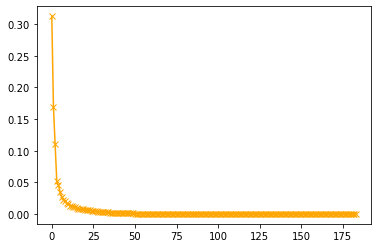

In [5]:
import numpy as np
var = principle_comp.explained_variance_ratio_
cummulative = np.cumsum(var)
ax = plt.gca()
ax.plot(var, marker='x',c="orange")
c=0
for i in range(len(cummulative)):
    if cummulative[i]<=.91:
        c=c+1
print("90% of variance is explained by ",c,"components")

### Task 2.5 
Analyse the scatter plot visually. Do you expect a linear classifier to separate the two classes in the 2D-PC space? Write your answer in the provided field. Explain how you came to your conclusion in one or two sentences. 

**Answer to 2.5:** 
I don't think a linear classifier is going to separate the 2D pc space as there is any specific separation between the principle components when looking at the scatter plot.


## Task 3 - Deeper Analysis using PCA 

### Task 3.1
Plot the covariance matrix in a square figure. Use diverging colormap and center it on zero by restricting the range of the colormap to the interval [-1, 1] (use `vmin` and `vmax`). Add a colorbar with an appropriate label.

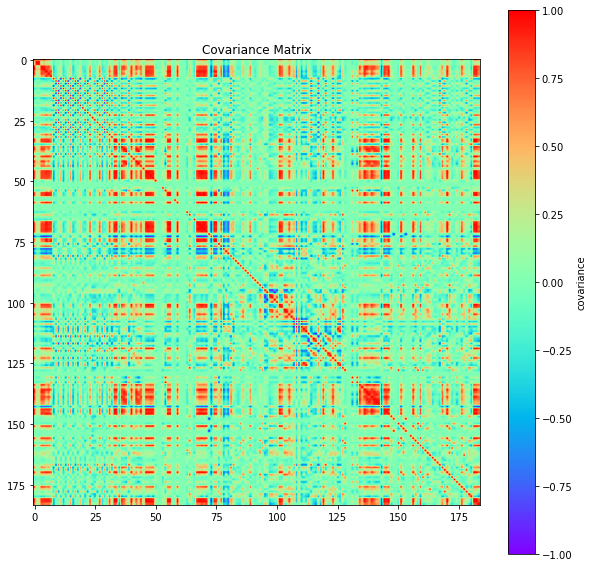

In [6]:
figure = plt.figure(figsize=(10,10))
axis = plt.gca()
img = axis.imshow(principle_comp.get_covariance(),cmap='rainbow', vmin=-1, vmax=1)
axis.set_title("Covariance Matrix")
plt.colorbar(img, label="covariance")
t = ax.set_xlabel('Features')
t = ax.set_ylabel('Features')
plt.show()

### Task 3.2 
Plot the PCA components matrix in a square figure. Use diverging colormap but a different one from the one you used in 3.1. Center the colormap on as in 3.1. Add a colorbar with an appropriate label. Add axis labels that correctly refer to principal components or features.

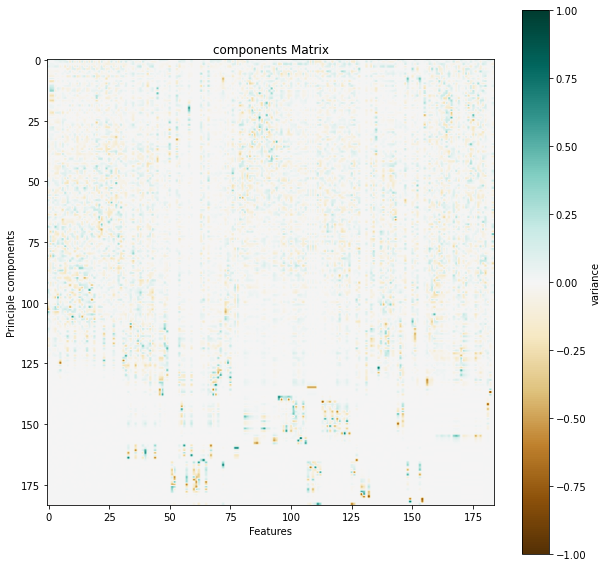

In [7]:
f = plt.figure(figsize=(10,10))
ax = plt.gca()
#plotting image
img = ax.imshow(principle_comp.components_,cmap='BrBG', vmin=-1, vmax=1)
ax.set_title("components Matrix")
plt.colorbar(img,label="variance")
t = ax.set_ylabel('Principle components')
t = ax.set_xlabel('Features')
plt.show()

### Task 3.3 
Analyse the two plots visually. Describe and interpret the patterns you see in 150 words or less.

**Answer to 3.3:** 
the covarince plot show that most features doesnot have covariance between them. the most covariance is observer between 1-5 features, 25-75 features and 130-140 features. other features doesnot show any significant covariance.

the component plot show the loading of the features in the each component. the 90% of the variance is explained by 1st 19 components and the loading of those components are similar to each other. 

## Task 4 - Optimise a neural network 

Optimise the architecture of a Multilayer Perceptron network to separate "fruity" and "non-fruity". Change the values in the `param_dict` parameter dictionary to optimise the architecture. 

You may also use the results from the PCA for data selection, e.g. by feeding PCA-transformed data into the network. 


* 0.69 $<=$ accuracy $<$ 0.70 : 10 points
* 0.70 $<=$ accuracy $<$ 0.73 : 15 points 
* 0.73 $<=$ accuracy $<$ 0.75 : 20 points
* 0.75 $<=$ accuracy : 25 points 


In [8]:
# change the parameters here
# refer to the practical and the documentation for MLPClassifier for options.
# The documentation is here:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
param_dict = {
    "hidden_layer_sizes":(5,7), 
    "activation":'relu',
    "solver":'adam'
}
X_train_nn = X_train

# optional: Use the PCA-transformed data with the code below. 
# You may want to adapt the number of principal components used.
#X_train_nn = X_pca[:,:140]

In [9]:
from sklearn import neural_network as nn
import sklearn.model_selection as ms
import numpy.random as nr
nr.seed(12345)
mlp = nn.MLPClassifier(**param_dict)
scores = ms.cross_val_score(mlp, X_train_nn, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7543 (+/- 0.0702)
